## Customer Segmentation & Clustering on MALL DATA

#### Import all required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#### Reading the data

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [6]:
# First five rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# shape of the data
data.shape

(200, 5)

In [8]:
# Get the basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# checking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Analysis

##### 1. Univariate Analysis

In [7]:
# describe the numerical columns
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### Plotting Distplot

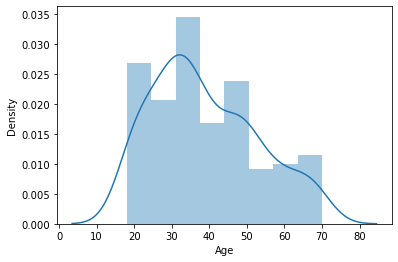

In [13]:
sns.distplot(data['Age'])

In [14]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

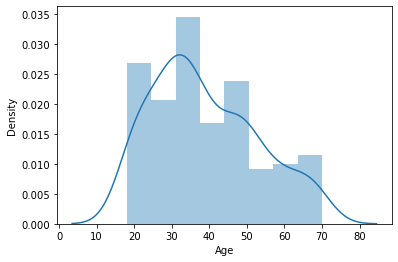

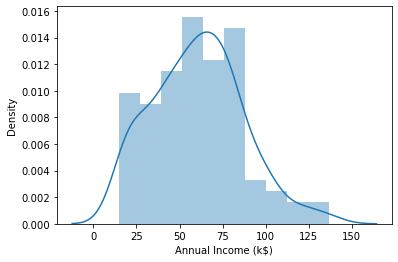

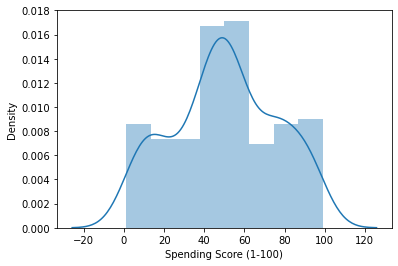

In [16]:
columns= ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for column in columns:
    plt.figure()
    sns.distplot(data[column])

##### Plotting Kdeplot

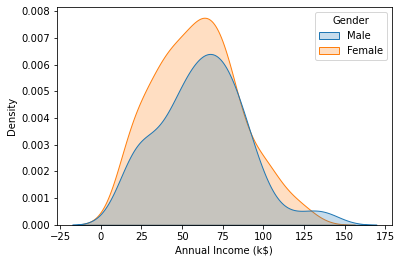

In [19]:
sns.kdeplot(data= data, x= data['Annual Income (k$)'],shade=True,hue='Gender')

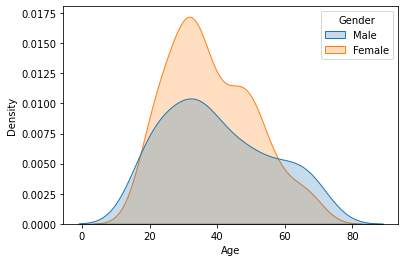

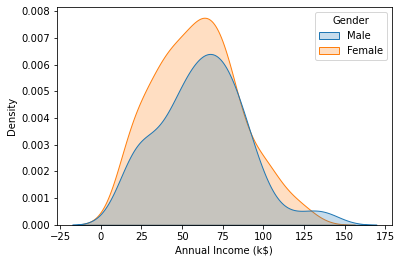

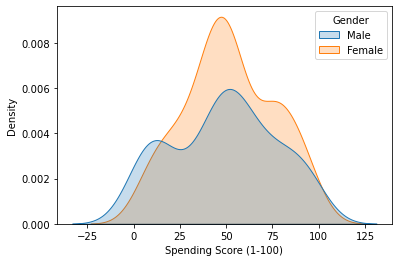

In [21]:
for column in columns:
    plt.figure()
    sns.kdeplot(data= data, x= data[column],shade=True,hue='Gender')

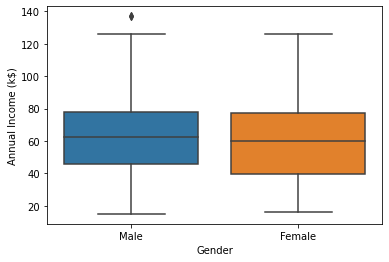

In [29]:
sns.boxplot(y= data['Annual Income (k$)'],x=data['Gender'])

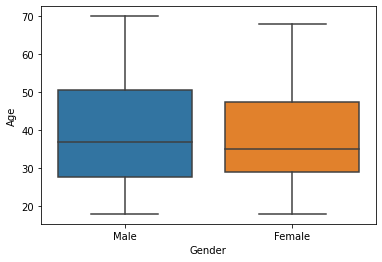

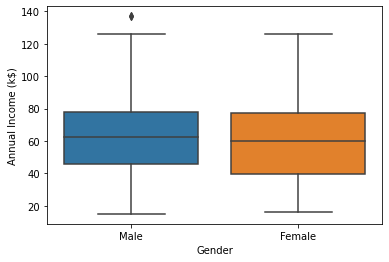

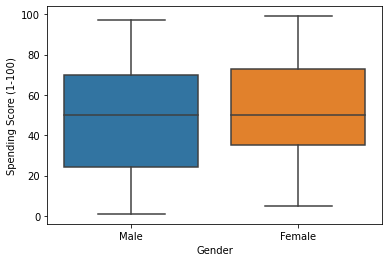

In [30]:
for column in columns:
    plt.figure()
    sns.boxplot(y= data[column],x=data['Gender'])

In [31]:
data['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

##### 2. Bivariate Analysis

In [33]:
data= data.drop('CustomerID',axis=1)

##### Pairplot

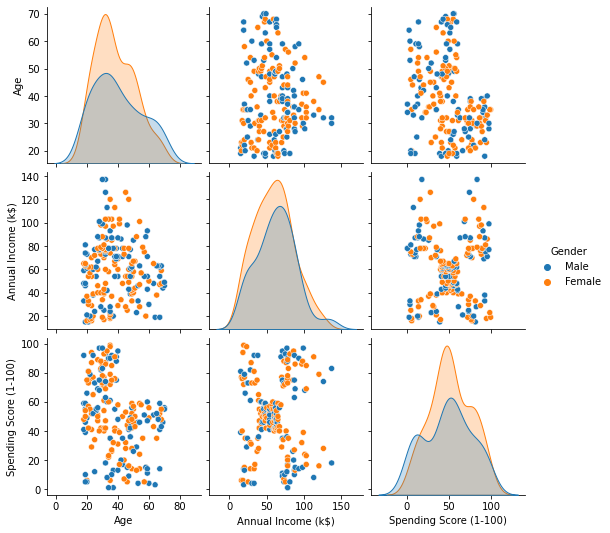

In [35]:
sns.pairplot(data= data,hue= 'Gender')

In [44]:
data.groupby('Gender')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


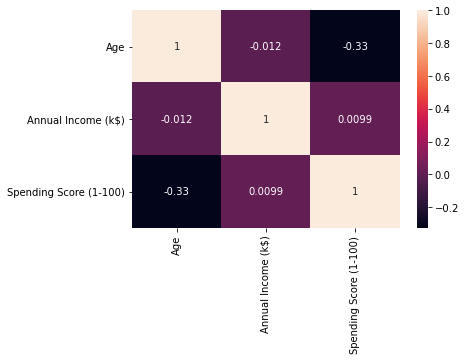

In [45]:
sns.heatmap(data.corr(),annot= True)

#### Clustering- Univariate, Bivariate, Multivariate

#### 1. Univariate clustering

In [48]:
clustering1 = KMeans()

In [50]:
clustering1.fit(data[['Annual Income (k$)']])

KMeans()

In [53]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3,
       3, 3])

In [54]:
data['Income Cluster'] = clustering1.labels_

In [55]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [56]:
data['Income Cluster'].value_counts()

6    42
4    36
2    30
0    28
5    28
1    16
7    14
3     6
Name: Income Cluster, dtype: int64

In [58]:
clustering1.inertia_

2831.296031746034

In [60]:
# Lets get the optimum cluster value using elbow method or wcss.
wcss= []


for i in range(1,11):
    cluster = KMeans(n_clusters=i)
    cluster.fit(data[['Annual Income (k$)']])
    wcss.append(cluster.inertia_)

print(wcss)

[137277.2800000002, 48660.88888888887, 23517.33093093092, 13278.112713472474, 8481.49619047619, 5050.904761904766, 3931.9880952380995, 2822.4996947496957, 2220.6341269841287, 1743.4772727272732]


In [62]:
wcss= [KMeans(n_clusters=i).fit(data[['Annual Income (k$)']]).inertia_ for i in range(1,11)]

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3941.41636141636,
 2857.4416971916967,
 2208.8120490620495,
 1736.5656510156507]

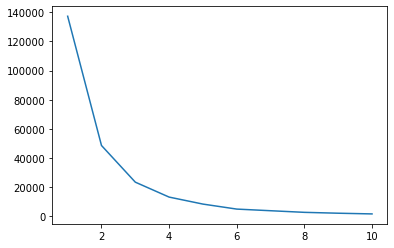

In [63]:
plt.plot(range(1,11),wcss)

In [64]:
# final model for univariate
clustering1= KMeans(n_clusters=3)
clustering1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [65]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [66]:
data['Income Cluster'] = clustering1.labels_

In [68]:
data['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

#### Bivariate Clustering

In [69]:
X= data[['Annual Income (k$)','Spending Score (1-100)']]

In [76]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [72]:
Inertia= []


for i in range(1,11):
    cluster = KMeans(n_clusters=i)
    cluster.fit(X.values)
    Inertia.append(cluster.inertia_)

print(Inertia)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30273.394312070028, 25018.781613414074, 21900.34135010752, 19657.783608703947]


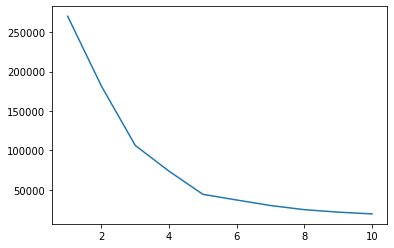

In [73]:
plt.plot(range(1,11),Inertia)

In [75]:
#Final model for bivariate segmentation
clustering2 = KMeans(n_clusters=5)
clustering2.fit(X.values)

y= clustering2.predict(X.values)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [78]:
X= X.values

In [81]:
clustering2.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

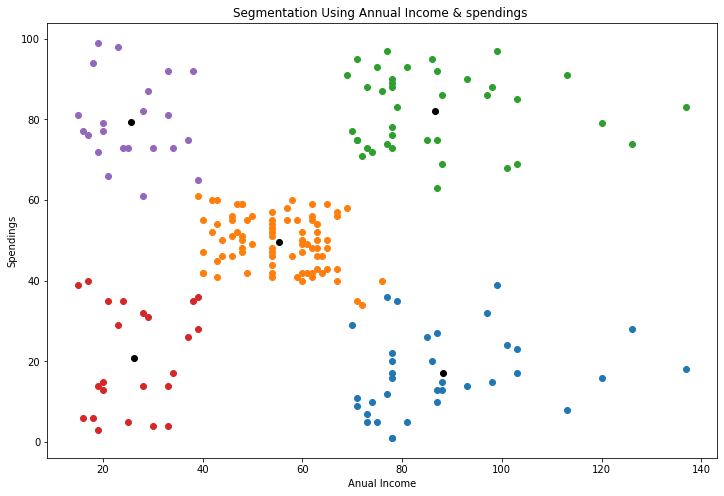

In [87]:
plt.figure(figsize=(12,8))  
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
plt.scatter(clustering2.cluster_centers_[:,0],clustering2.cluster_centers_[:,1],c='black')
plt.xlabel('Anual Income')
plt.ylabel('Spendings')
plt.title('Segmentation Using Annual Income & spendings ')
plt.show()